<a href="https://colab.research.google.com/github/Jay-D21/Deep-Learning/blob/main/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

#Three Layer NN with Backpropogation
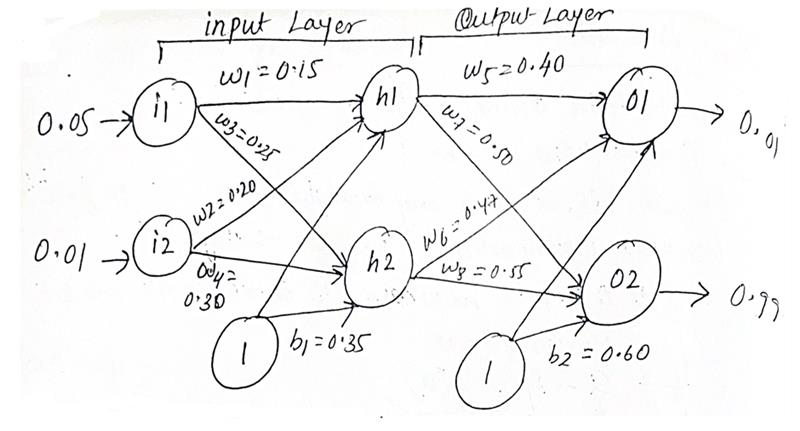

In [ ]:
class ThreeLayerNN:
  def __init__(self, w_init=None, b_init=None):
    # Intialize weights (or use defaults from problem)
    if w_init is None:
      self.w1, self.w2, self.w3, self.w4 = 0.15, 0.20, 0.25, 0.30
      self.w5, self.w6, self.w7, self.w8 = 0.40, 0.47, 0.50, 0.55
    else:
      (self.w1, self.w2, self.w3, self.w4), (self.w5, self.w6, self.w7, self.w8) = w_init

    if b_init is None:
      self.b1, self.b2 = 0.35, 0.35 #hidden biase
      self.b3, self.b4 = 0.60, 0.60 #output biase
    else:
      self.b1, self.b2, self.b3, self.b4 = b_init

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, s):
    return s * (1 - s)

  def forward_pass(self, x):
    self.x1, self.x2 = x

    #Hidden layer
    self.z1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1 #neth1
    self.h1 = self.sigmoid(self.z1) #outputh1
    self.z2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2 #neth2
    self.h2 = self.sigmoid(self.z2) #outputh2

    #output layer
    self.z3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3 #netout1
    self.o1 = self.sigmoid(self.z3) #out11
    self.z4 = self.w7 * self.h1 + self.w8 * self.h2 + self.b4 #netout2
    self.o2 = self.sigmoid(self.z4) #out22

    return np.array([self.o1, self.o2])

  def backward_pass(self, y_true, lr):
    # Output layer deltas
    error_o1 = self.o1 - y_true[0]
    error_o2 = self.o2 - y_true[1]

    delta_o1 = error_o1 * self.sigmoid_derivative(self.o1) #it is gradient of
    delta_o2 = error_o2 * self.sigmoid_derivative(self.o2)

    # Gradients hidden -> output
    dw5 = delta_o1 * self.h1 # Here we are multiplyng delta_o1 obtained about
    dw6 = delta_o1 * self.h2
    dw7 = delta_o2 * self.h1
    dw8 = delta_o2 * self.h2

    db3 = delta_o1
    db4 = delta_o2

    # Gradients hidden -> hidden
    delta_h1 = (delta_o1 * self.w5 + delta_o2 * self.w7) * self.sigmoid_derivative(self.h1)
    delta_h2 = (delta_o1 * self.w6 + delta_o2 * self.w8) * self.sigmoid_derivative(self.h2)

    # Gradients input -> hidden
    dw1 = delta_h1 * self.x1
    dw2 = delta_h1 * self.x2
    dw3 = delta_h2 * self.x1
    dw4 = delta_h2 * self.x2

    db1 = delta_h1
    db2 = delta_h2

    # Update weights and biases
    self.w1 -= lr * dw1
    self.w2 -= lr * dw2
    self.w3 -= lr * dw3
    self.w4 -= lr * dw4
    self.w5 -= lr * dw5
    self.w6 -= lr * dw6
    self.w7 -= lr * dw7
    self.w8 -= lr * dw8

    self.b1 -= lr * db1
    self.b2 -= lr * db2
    self.b3 -= lr * db3
    self.b4 -= lr * db4

    return (dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8,
            db1, db2, db3, db4,
            self.w1, self.w2, self.w3, self.w4,
            self.w5, self.w6, self.w7, self.w8,
            self.b1, self.b2, self.b3, self.b4)

  def  predict(self, x):
    y_pred = self.forward_pass(x)
    return y_pred

  def display_loss(self, x, y):
    y_pred = self.forward_pass(x)
    loss = 0.5 * ((y_pred - y)**2)
    return loss

In [ ]:
X = np.array([[0.05, 0.01]])
Y = np.array([[0.01, 0.99]])
lr = 0.5 # Learning Rate

In [ ]:
FFN = ThreeLayerNN() #Create a new nwural network object with its weights and bias

In [ ]:
A = FFN.forward_pass(X[0]) #runs the network's forward pass on the first input sample

In [ ]:
display(A)

array([0.75269584, 0.77191637])

In [ ]:
B = FFN.predict(X[0])

In [ ]:
display(B)

array([0.75269584, 0.77191637])

In [ ]:
loss = FFN.display_loss(X[0], Y[0])

In [ ]:
display(loss)

array([0.27579855, 0.02378024])

In [ ]:
display(loss.sum()) #Etotal

np.float64(0.29957878928852544)

In [ ]:
(dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8,
 db1, db2, db3, db4,
 w1_new, w2_new, w3_new, w4_new, w5_new, w6_new, w7_new, w8_new,
 b1_new, b2_new, b3_new, b4_new) = FFN.backward_pass(Y[0], lr)

print("Gradients:")
display(f"dw1: {dw1}, dw2: {dw2}, dw3: {dw3}, dw4: {dw4}")
display(f"dw5: {dw5}, dw6: {dw6}, dw7: {dw7}, dw8: {dw8}")
display(f"db1: {db1}, db2: {db2}, db3: {db3}, db4: {db4}")

print("\nUpdated Weights and Biases:")
display(f"w1: {w1_new}, w2: {w2_new}, w3: {w3_new}, w4: {w4_new}")
display(f"w5: {w5_new}, w6: {w6_new}, w7: {w7_new}, w8: {w8_new}")
display(f"b1: {b1_new}, b2: {b2_new}, b3: {b3_new}, b4: {b4_new}")

Gradients:


'dw1: 0.00043699696258621006, dw2: 8.739939251724201e-05, dw3: 0.0005303295881540441, dw4: 0.00010606591763080882'

'dw5: 0.08141750429646401, dw6: 0.08161821155636767, dw7: -0.022612224992519105, dw8: -0.02266796776869225'

'db1: 0.008739939251724201, db2: 0.010606591763080882, db3: 0.13824897820609783, db4: -0.038396129028950385'


Updated Weights and Biases:


'w1: 0.1497815015187069, w2: 0.1999563003037414, w3: 0.249734835205923, w4: 0.29994696704118456'

'w5: 0.359291247851768, w6: 0.4291908942218161, w7: 0.5113061124962596, w8: 0.5613339838843462'

'b1: 0.34563003037413786, b2: 0.34469670411845954, b3: 0.5308755108969511, b4: 0.6191980645144751'

# Playing with Epochs

In [ ]:
epochs = 100  # Define the number of epochs
loss_history = [] # List to store loss values for plotting

for epoch in range(epochs):
    # Forward pass
    output = FFN.forward_pass(X[0])

    # Calculate loss
    loss = FFN.display_loss(X[0], Y[0])
    total_loss = np.sum(loss)
    loss_history.append(total_loss)

    # Backward pass and update weights
    FFN.backward_pass(Y[0], lr)

    # Print loss every 1000 epochs (optional)
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}, Total Loss: {total_loss}")

print("\nTraining finished.")
print("Final Output after training:", FFN.predict(X[0]))


Training finished.
Final Output after training: [0.09478778 0.91949163]


### Visualize Loss Over Epochs

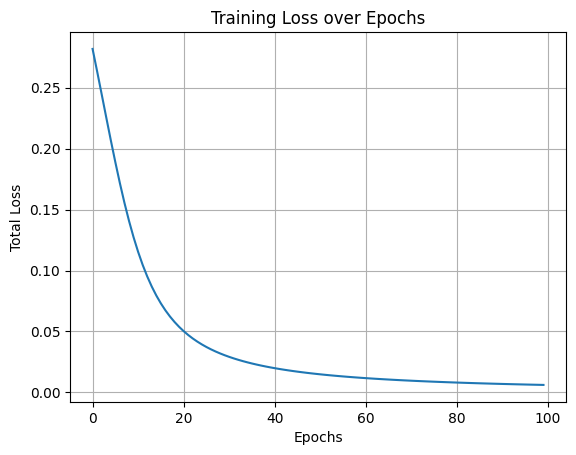

In [ ]:
# Plot the loss history
plt.plot(loss_history)  # Create a line plot of the loss values over time
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'
plt.ylabel('Total Loss')  # Label the y-axis as 'Total Loss'
plt.title('Training Loss over Epochs')  # Set the title of the plot
plt.grid(True)  # Add a grid to the plot for better readability
plt.show()  # Display the plot

### Evaluate Final Output

In [ ]:
# Get the final predicted output after training
final_output = FFN.predict(X[0])

# Display the final predicted output
print("Final Predicted Output:", final_output)

# Display the target output
print("Target Output:", Y[0])

# Calculate and display the mean squared error between the final output and the target output
mse = mean_squared_error(Y[0], final_output)
print("Mean Squared Error:", mse)

Final Predicted Output: [0.09478778 0.91949163]
Target Output: [0.01 0.99]
Mean Squared Error: 0.006080198766481167
